### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_72 = pd.read_csv('Patient 72_data.csv')

In [3]:
patient_72.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,...,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000,7515.000000
mean,0.031820,0.175976,0.424847,0.593927,0.863808,8.955971,1.576528,1.067395,1.026928,1.034325,...,1.706740,1.824553,1.763479,1.497917,0.892828,1.424239,1.883332,2.043598,2.070138,46.583260
std,0.005078,0.009856,0.011499,0.009966,0.014436,4.594530,0.472423,0.077558,0.025937,0.011257,...,0.027331,0.014791,0.018574,0.034522,0.049972,0.024872,0.009437,0.003943,0.000819,8.781831
min,0.005861,0.134994,0.372233,0.580831,0.846527,4.969137,1.299084,1.022953,1.013458,1.025996,...,1.538405,1.778619,1.653696,1.408056,0.394964,1.296161,1.840742,2.035546,2.061456,17.800000
25%,0.029542,0.171299,0.420775,0.589374,0.856753,6.950063,1.409812,1.046894,1.019356,1.030167,...,1.691392,1.815827,1.756577,1.475096,0.882778,1.408271,1.877519,2.041549,2.069781,42.100000
50%,0.032274,0.176140,0.425728,0.592063,0.860681,7.965506,1.470449,1.050843,1.021314,1.031321,...,1.707307,1.825350,1.765551,1.497885,0.901991,1.423719,1.884188,2.043170,2.070192,47.500000
75%,0.034908,0.181559,0.428893,0.595375,0.865570,9.211923,1.541545,1.056635,1.023512,1.032946,...,1.724657,1.833870,1.774381,1.519733,0.916828,1.440800,1.889367,2.044712,2.070618,51.700000
max,0.053005,0.218230,0.603809,0.725002,0.958006,77.920634,6.182416,2.030261,1.363791,1.122665,...,1.778954,1.873251,1.805699,1.683449,0.968870,1.501673,1.937304,2.068156,2.072121,94.600000


In [4]:
X=patient_72.drop('BIS', axis=1)
y= patient_72['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

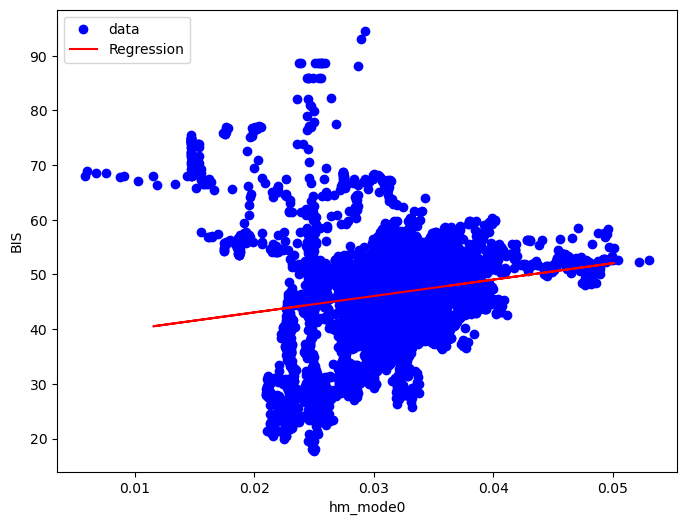

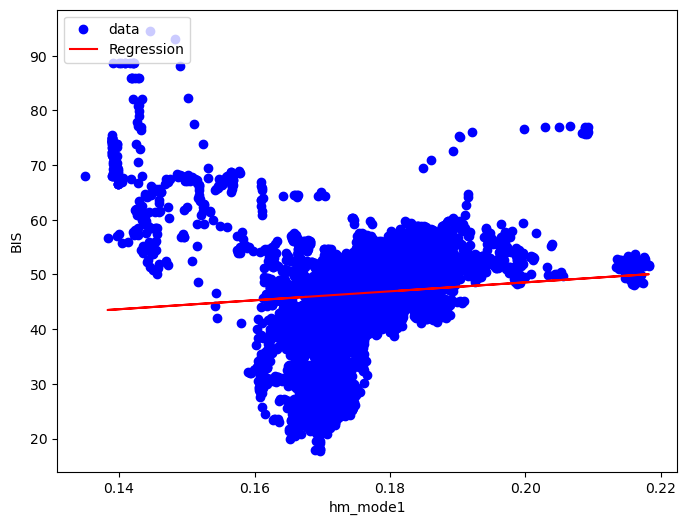

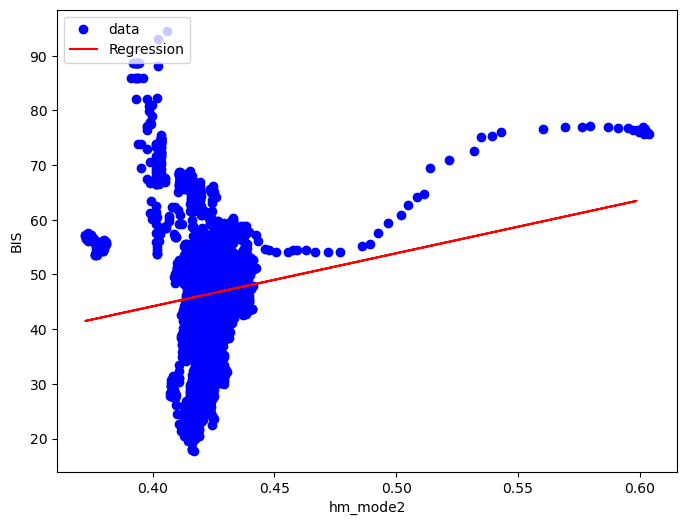

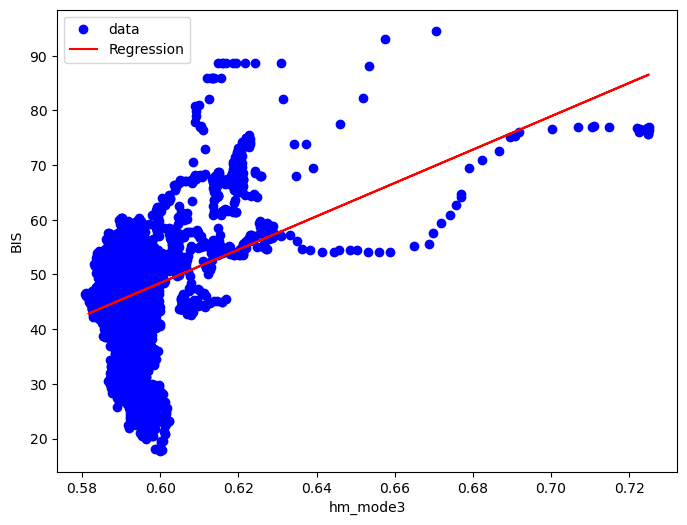

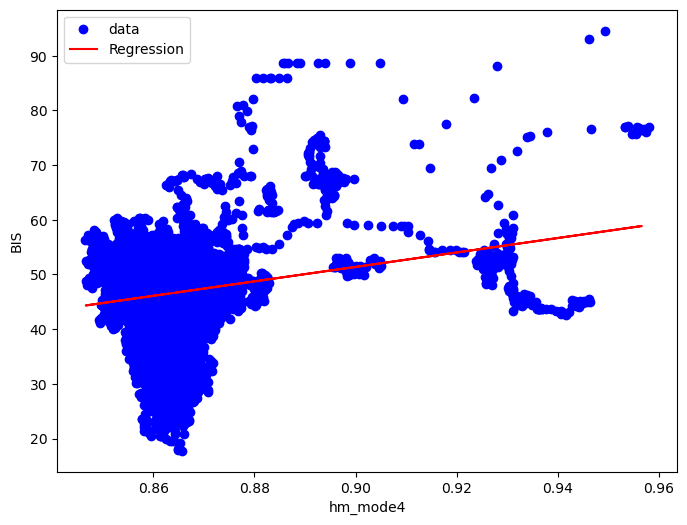

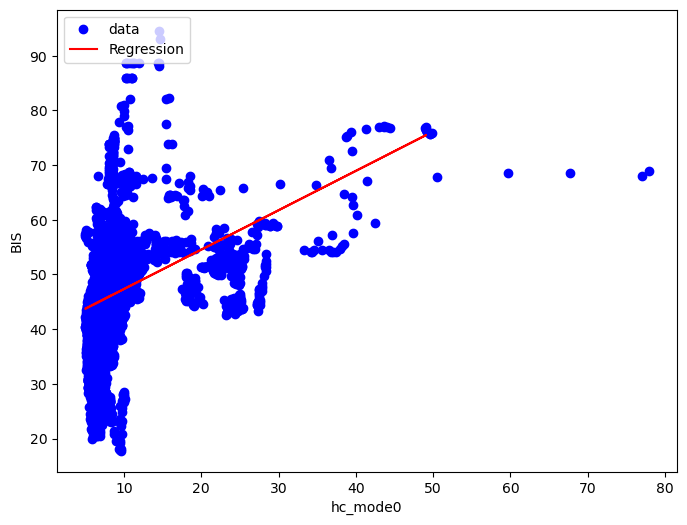

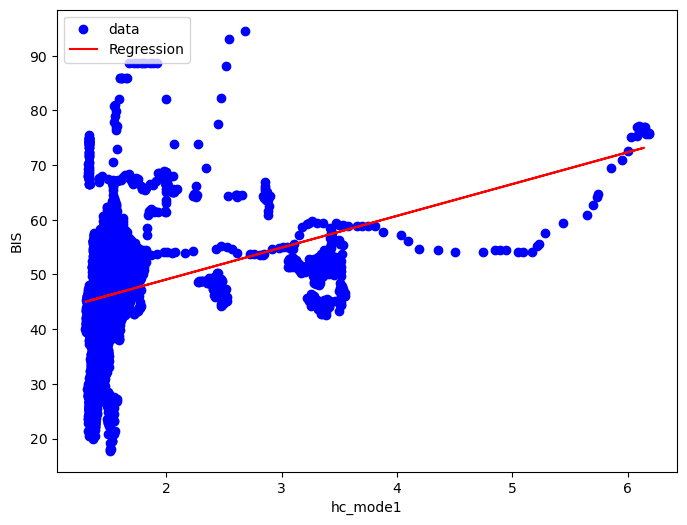

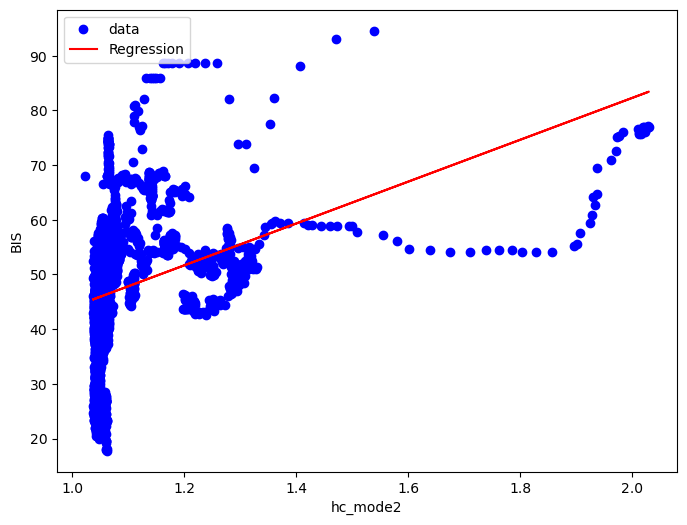

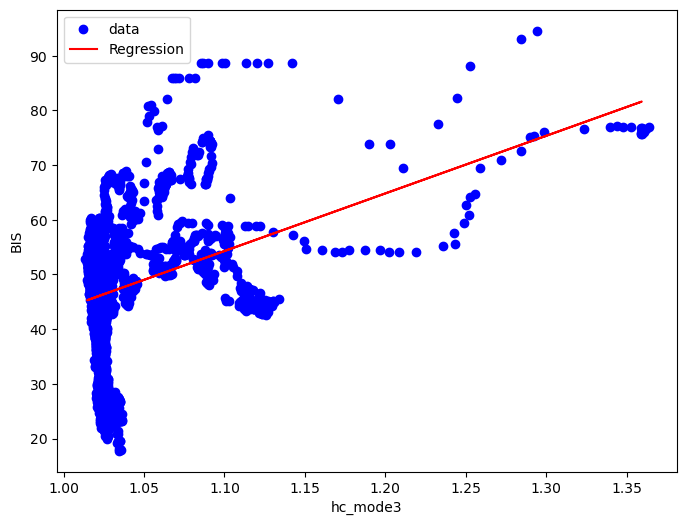

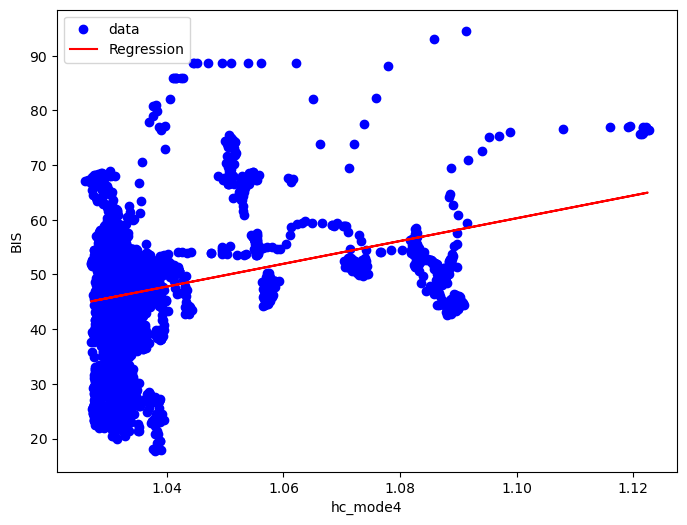

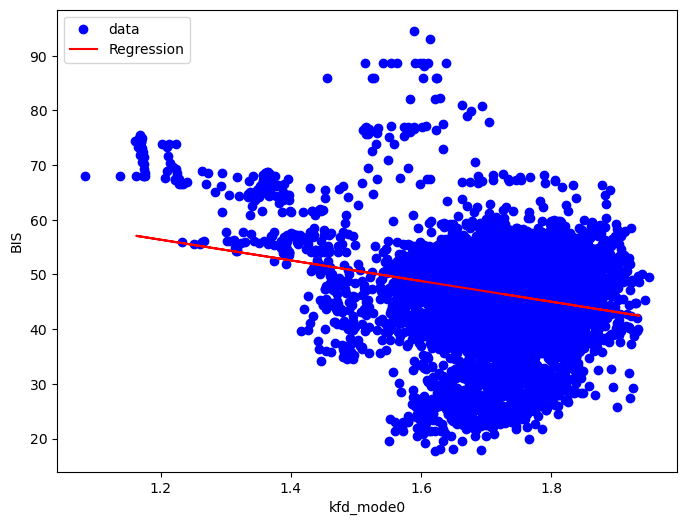

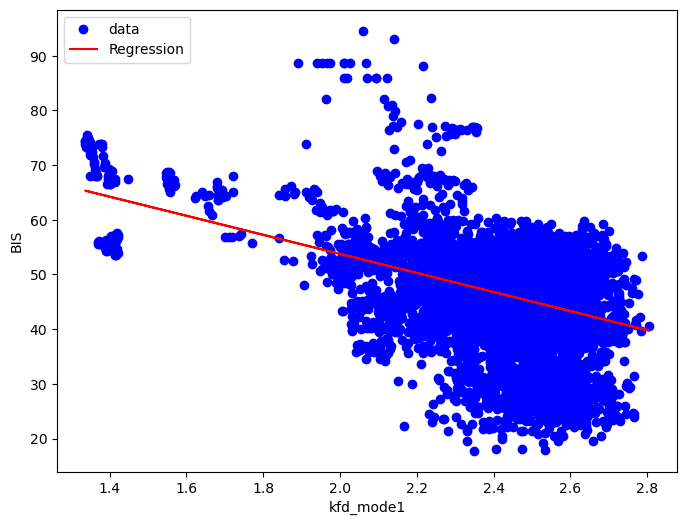

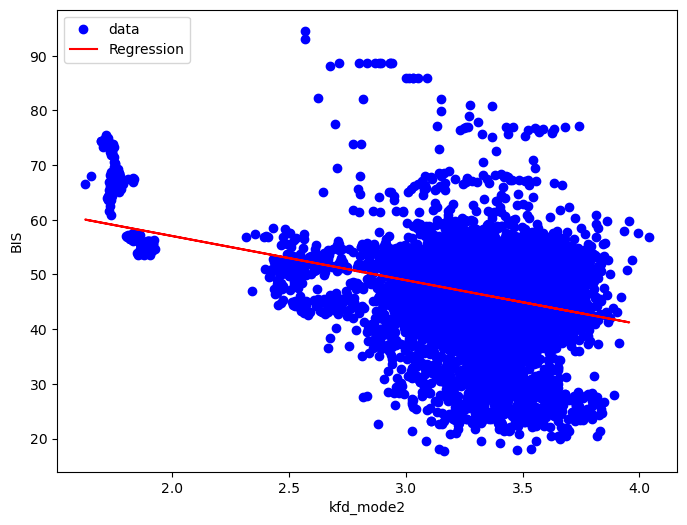

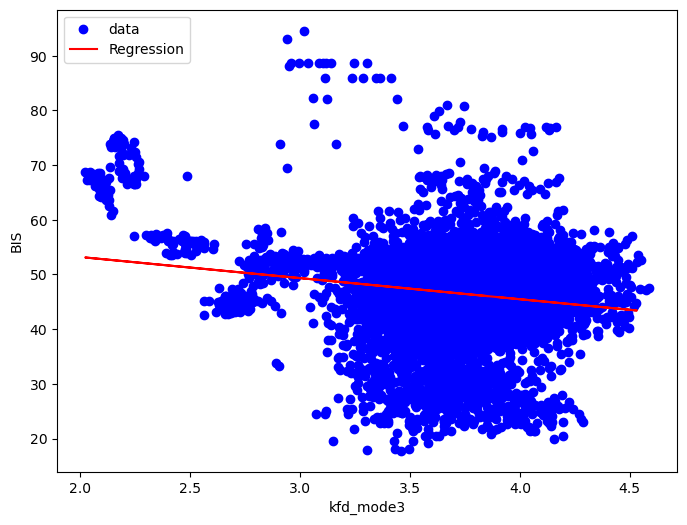

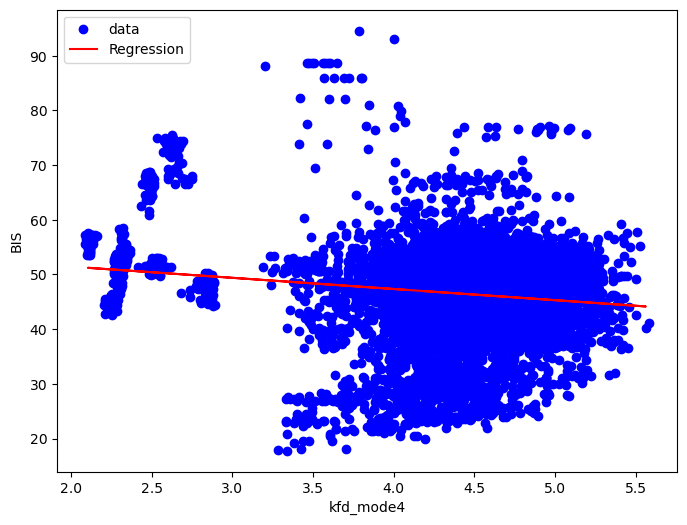

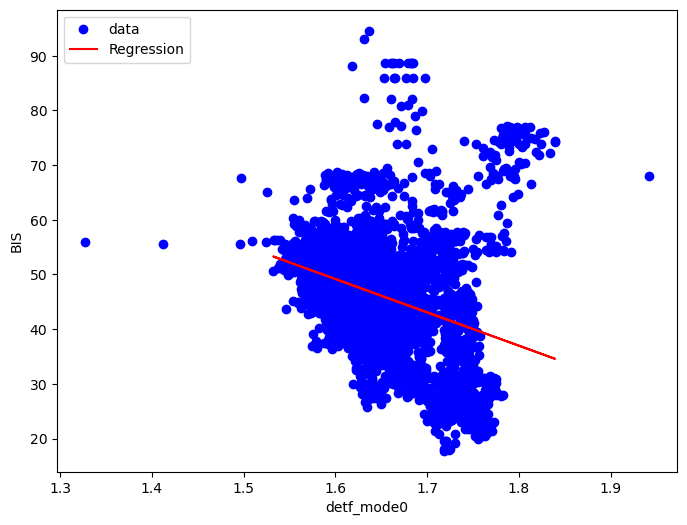

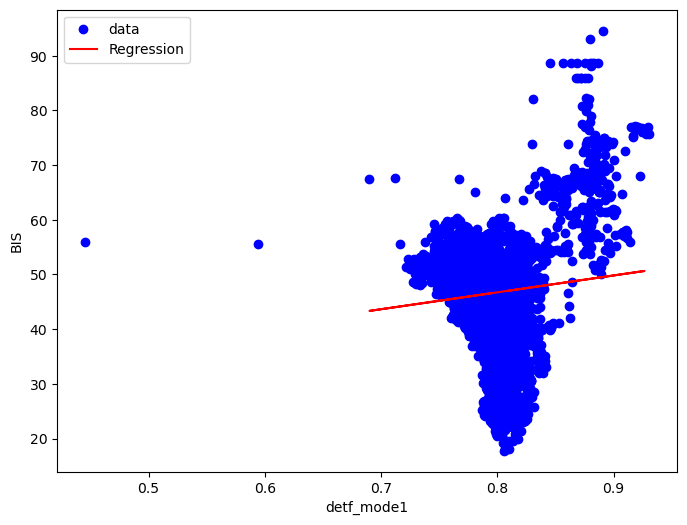

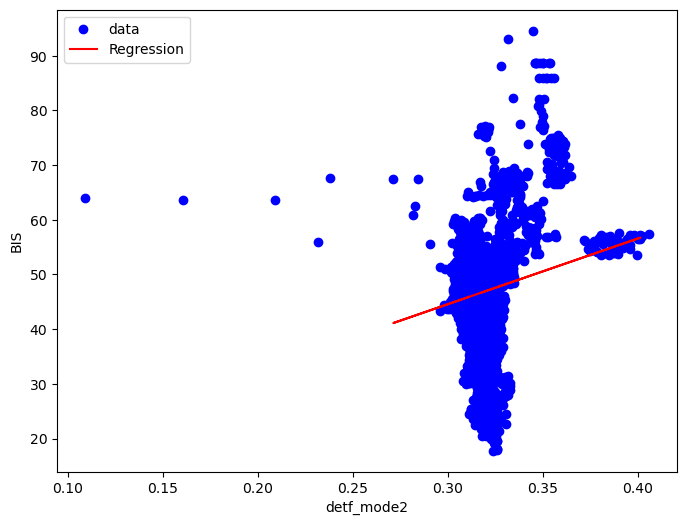

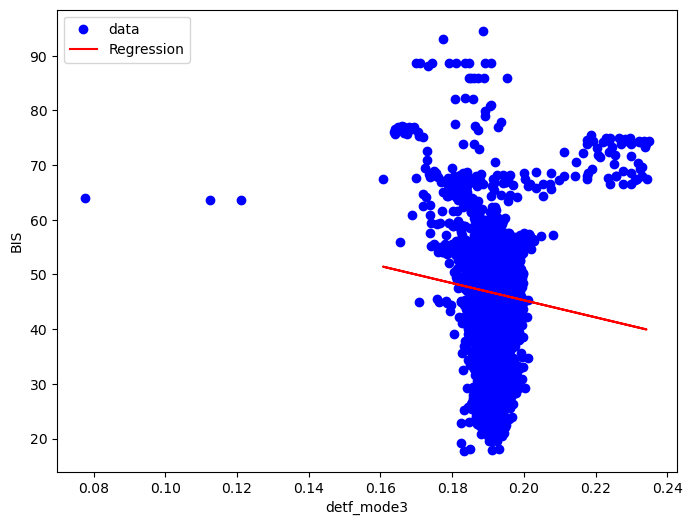

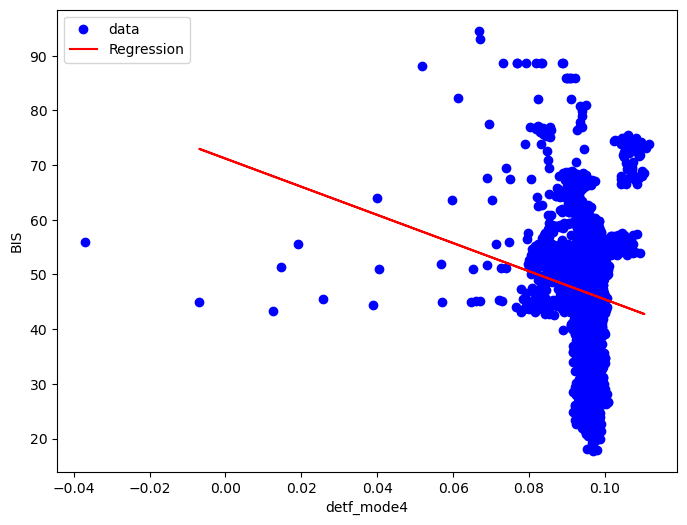

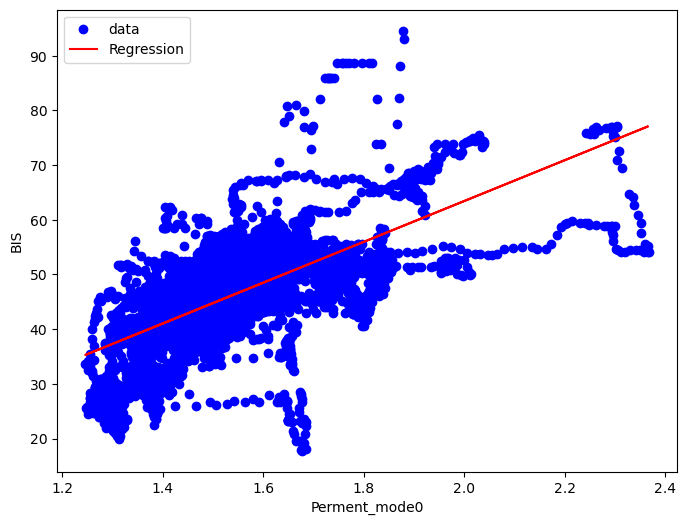

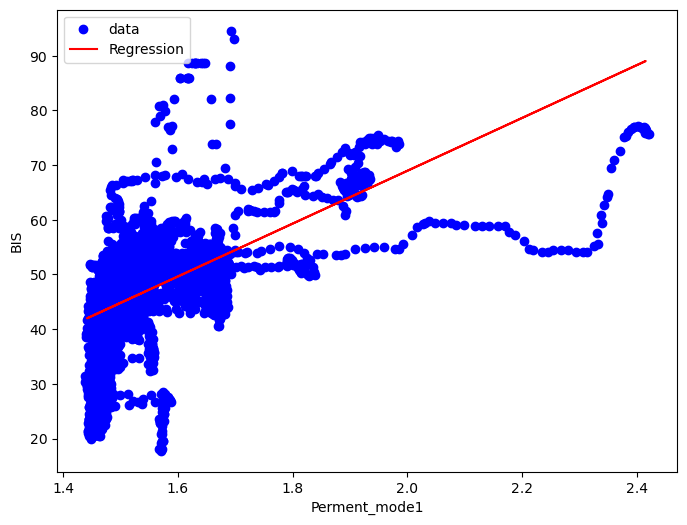

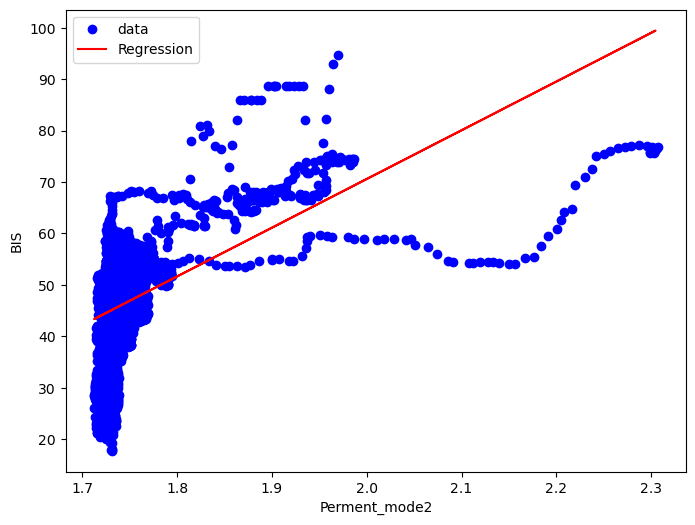

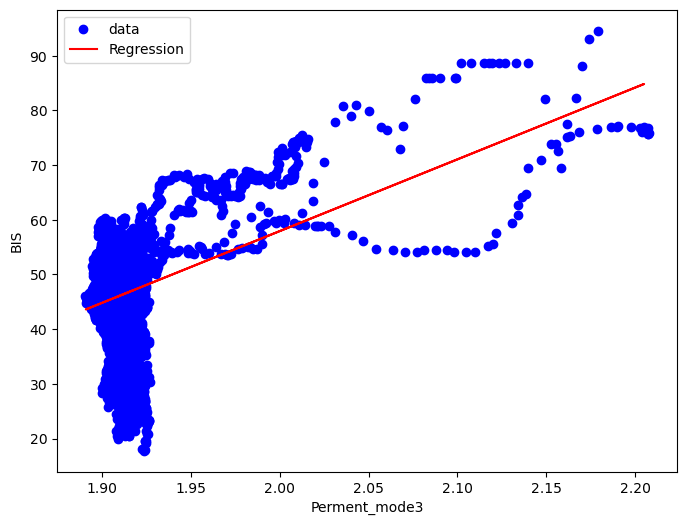

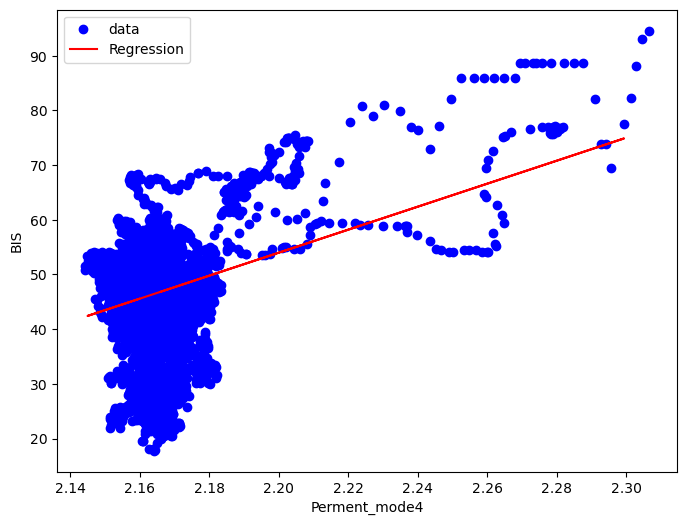

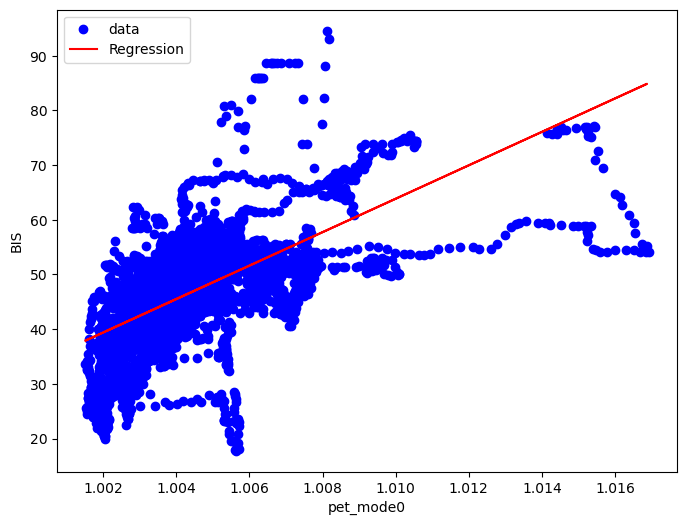

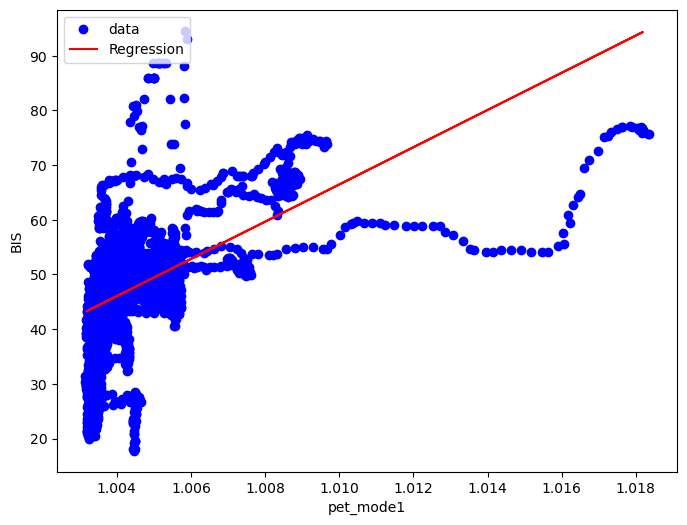

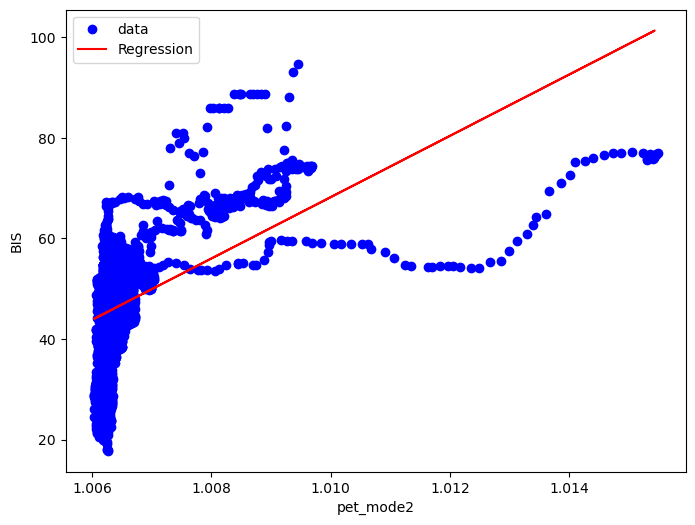

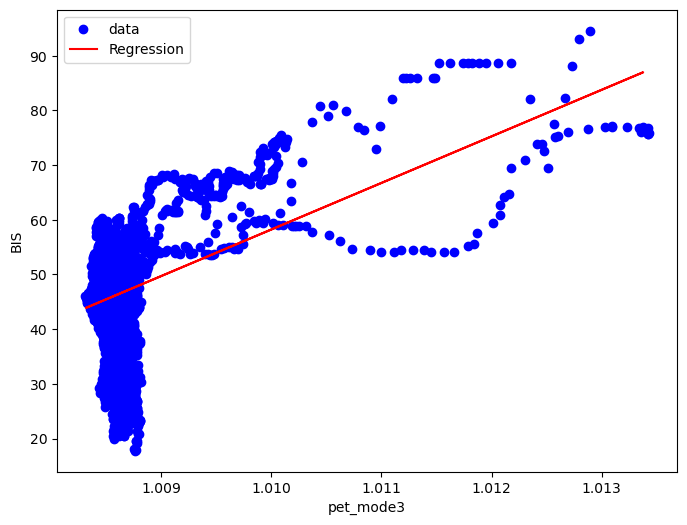

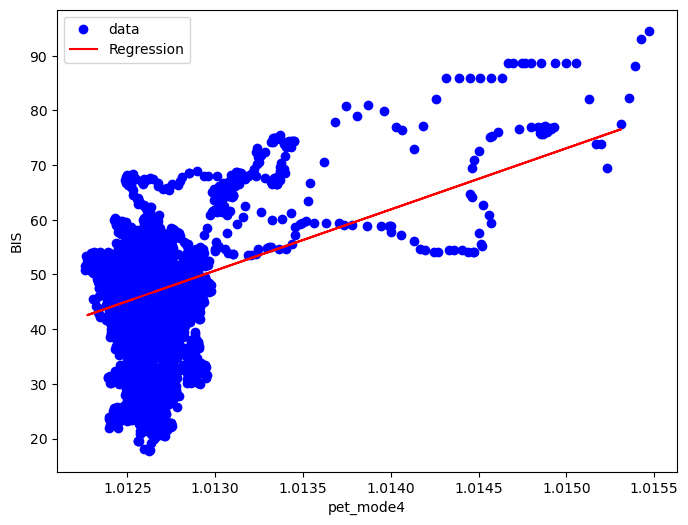

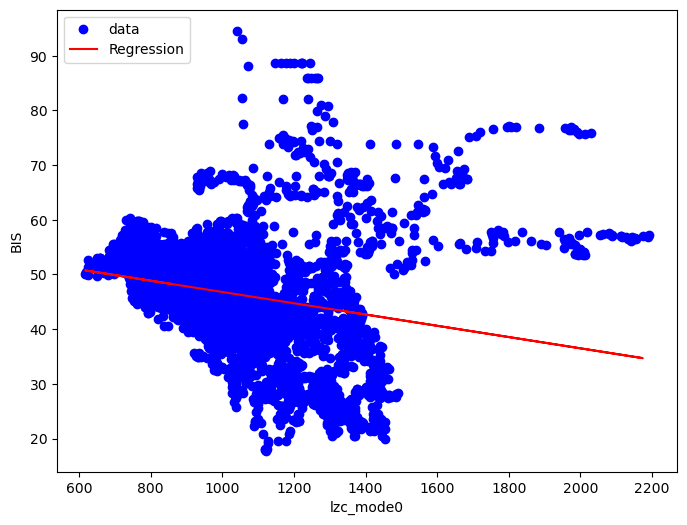

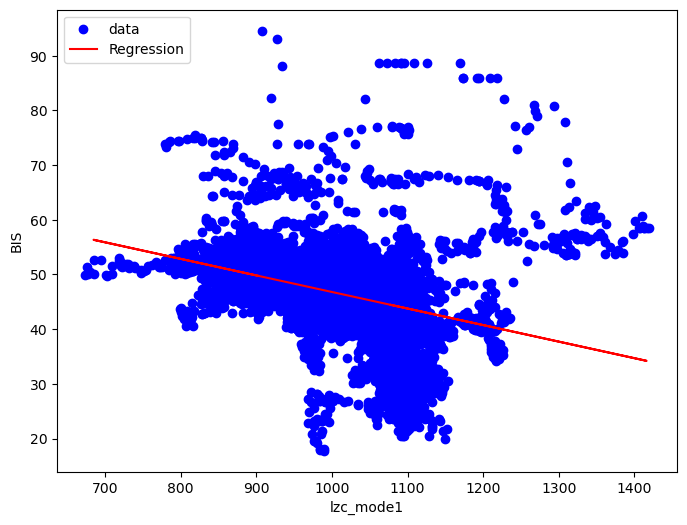

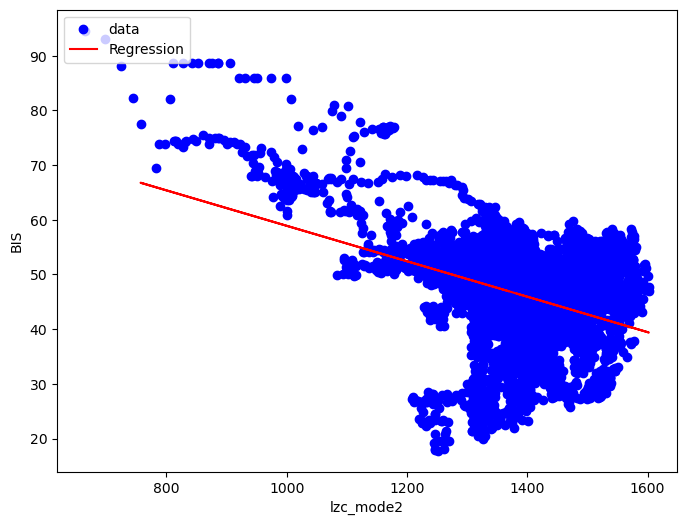

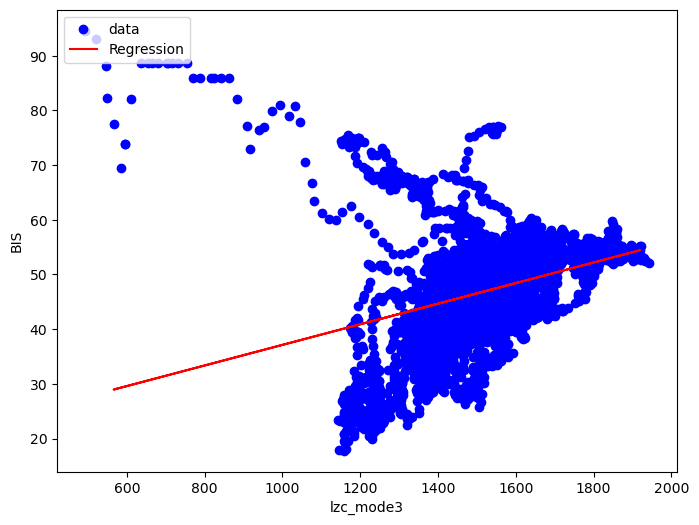

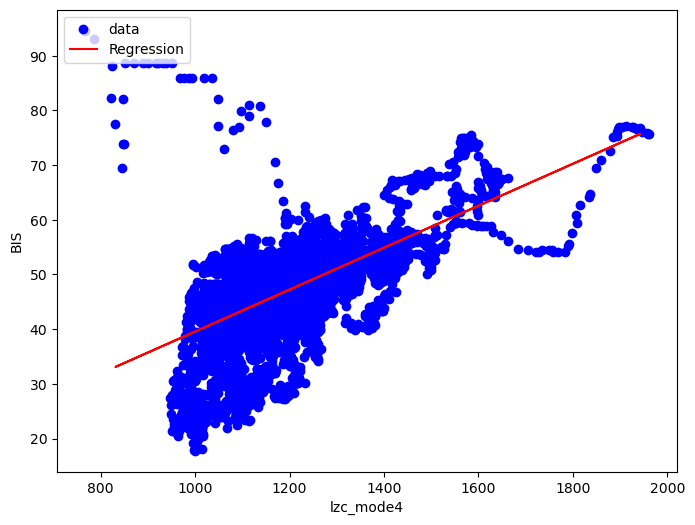

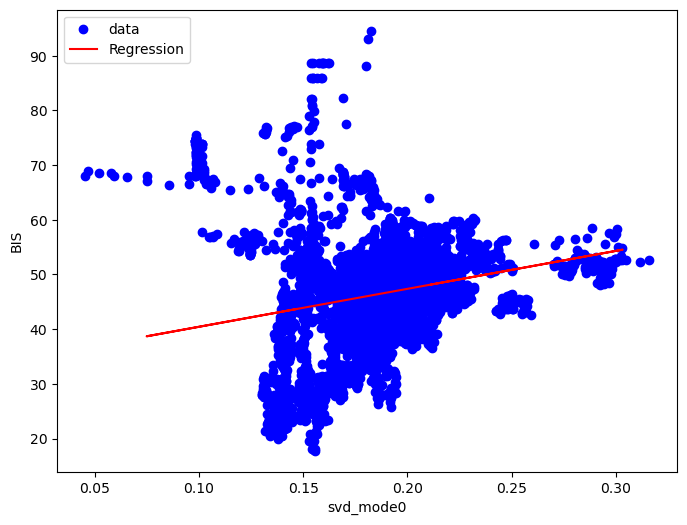

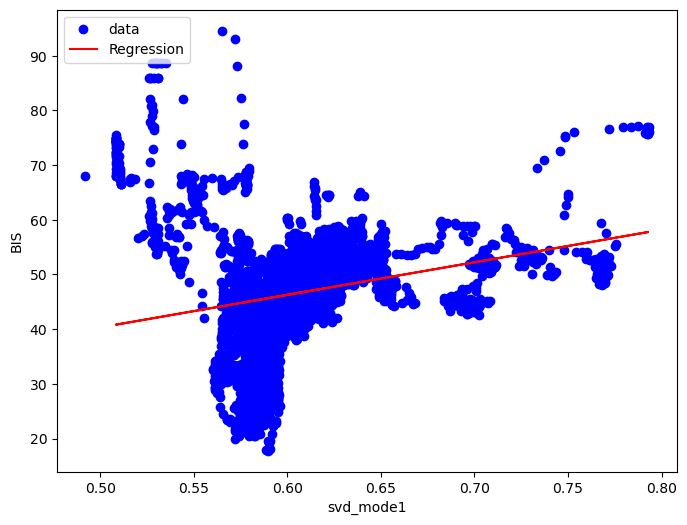

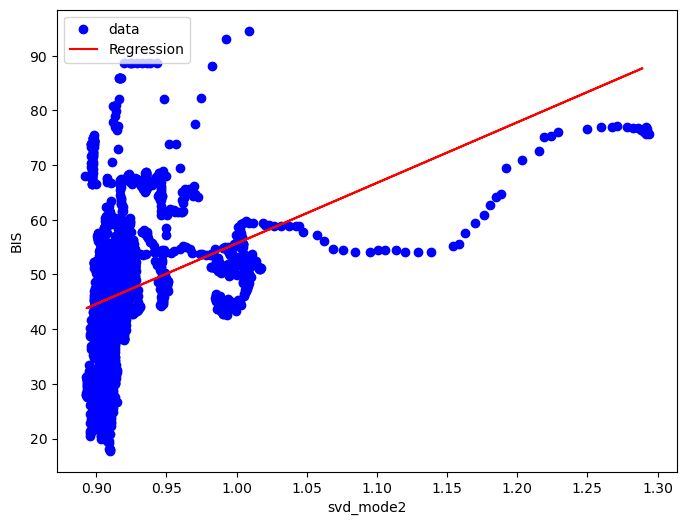

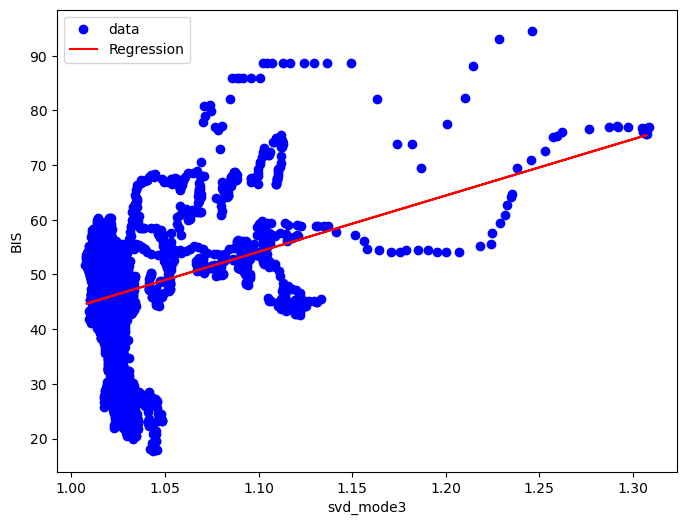

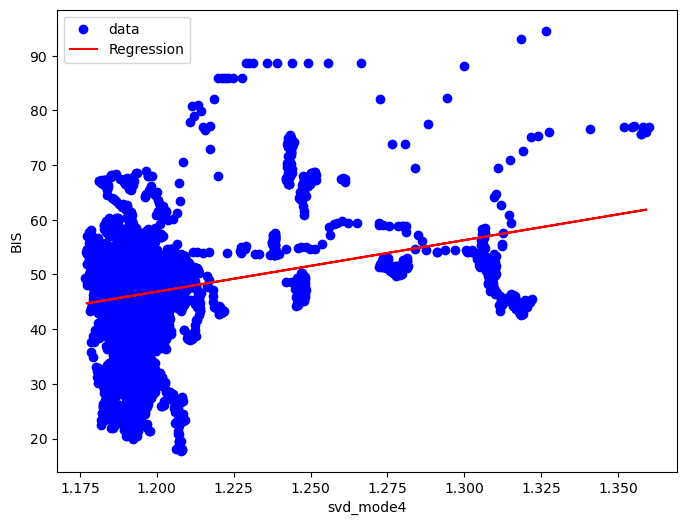

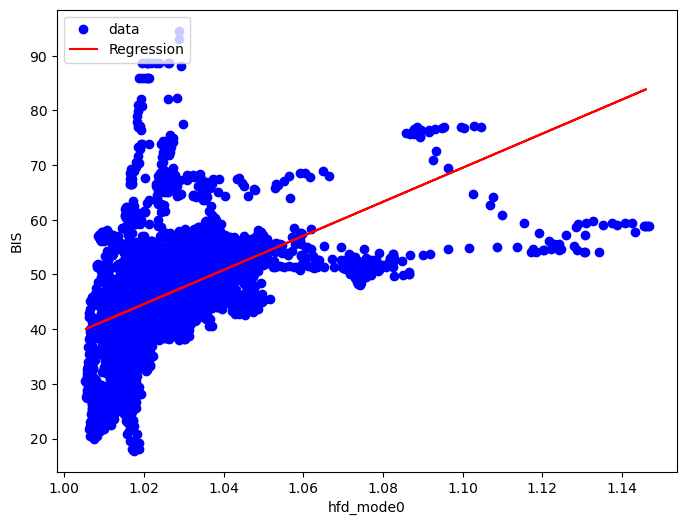

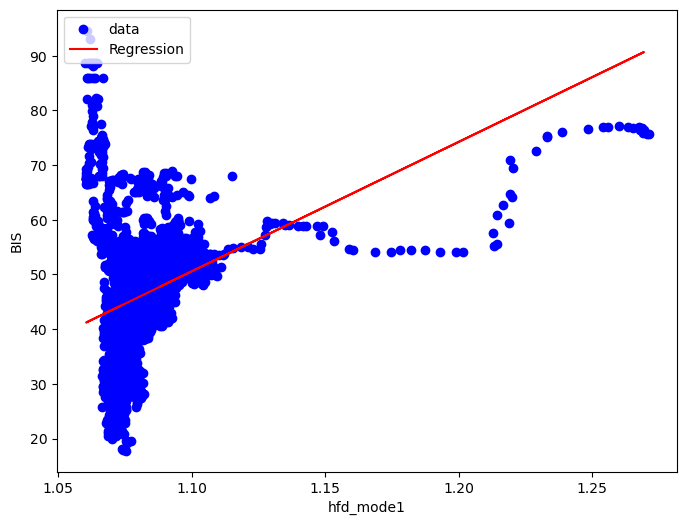

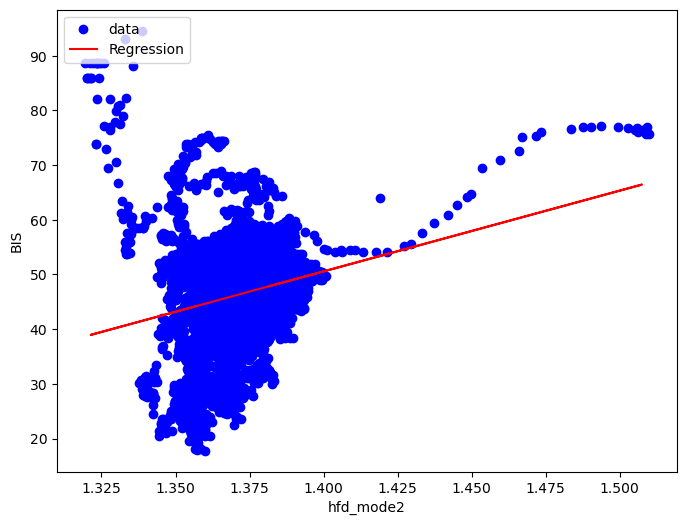

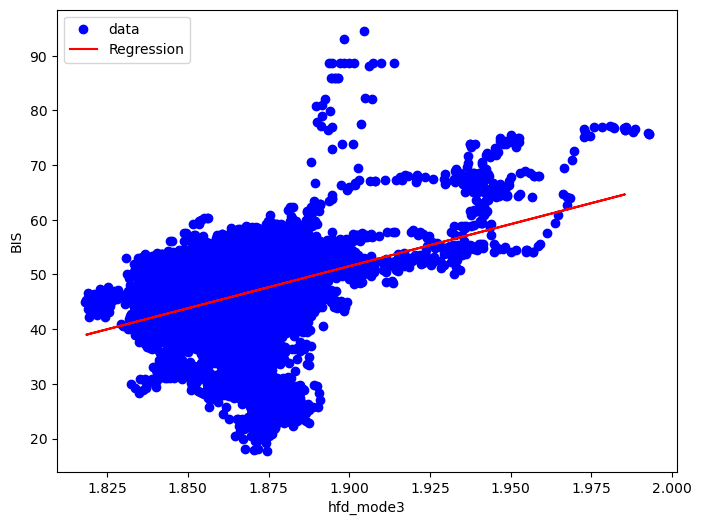

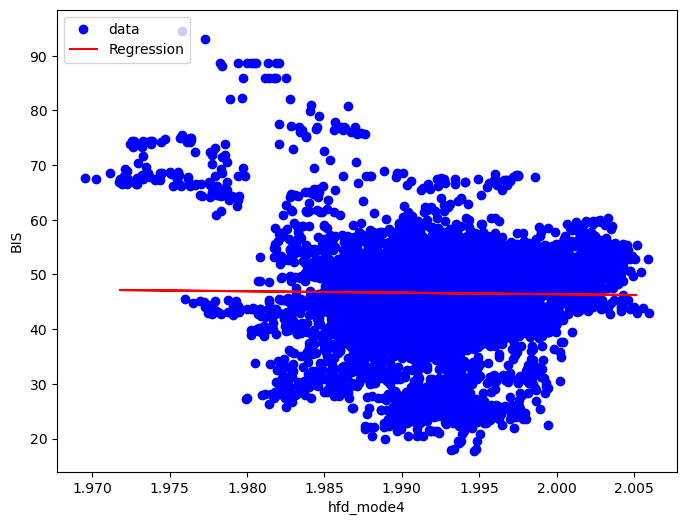

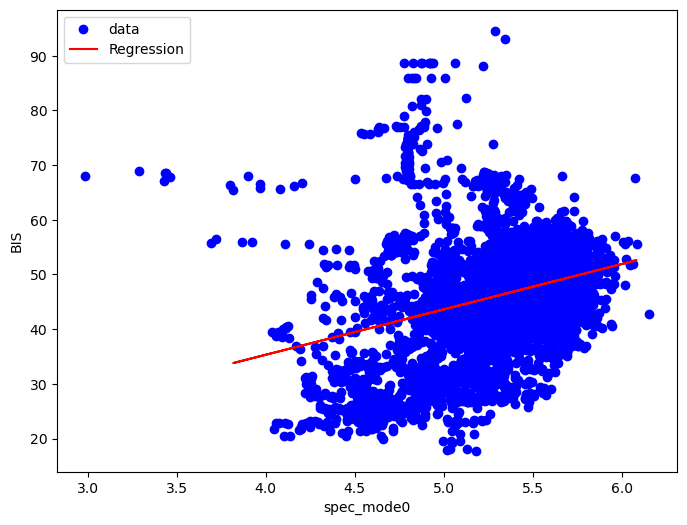

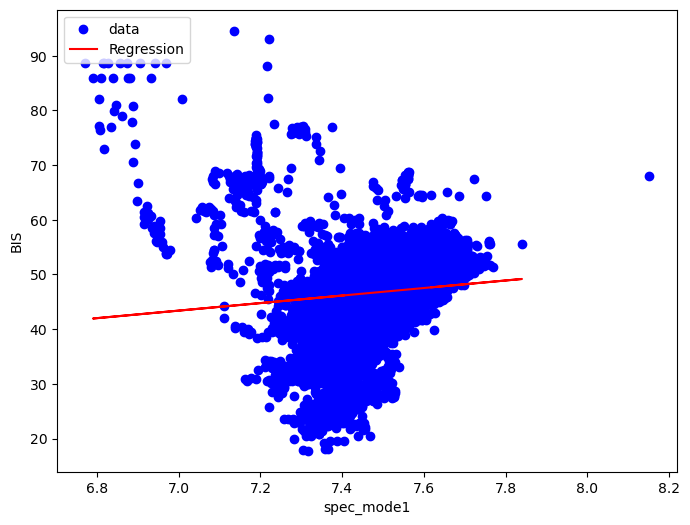

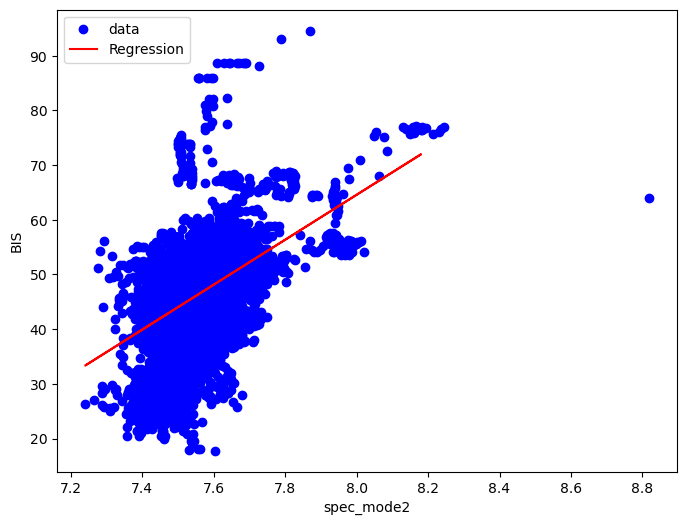

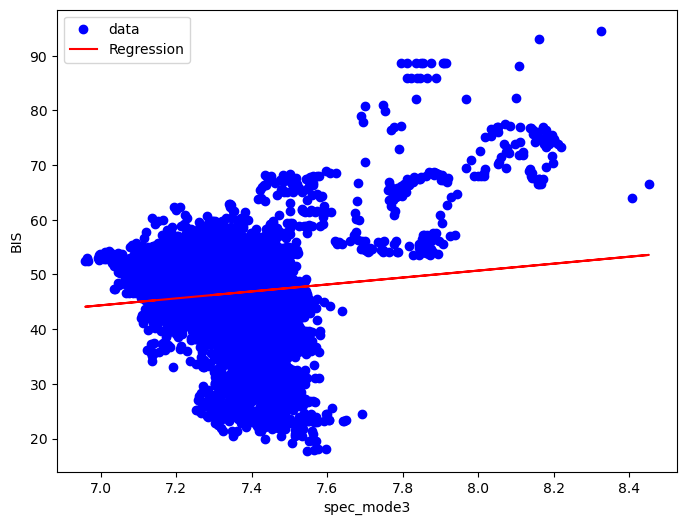

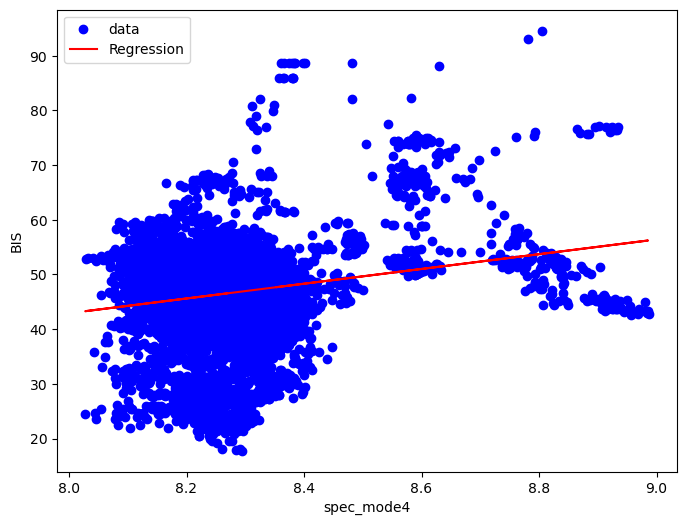

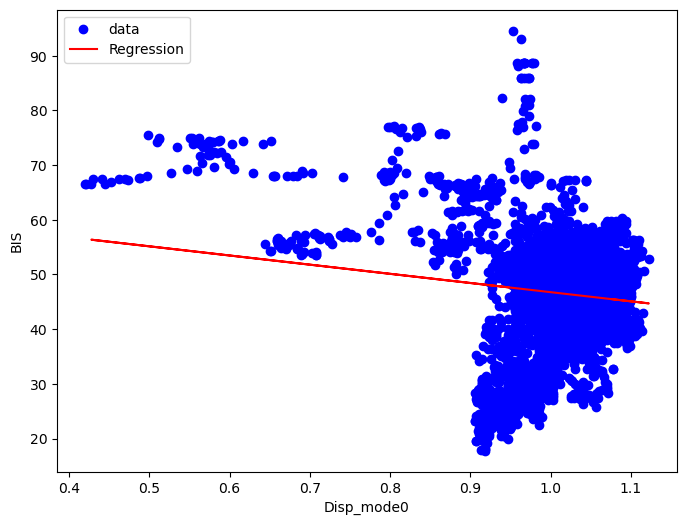

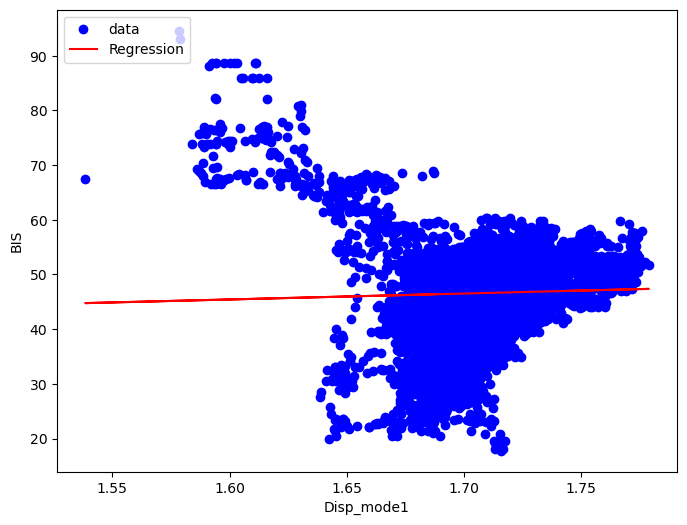

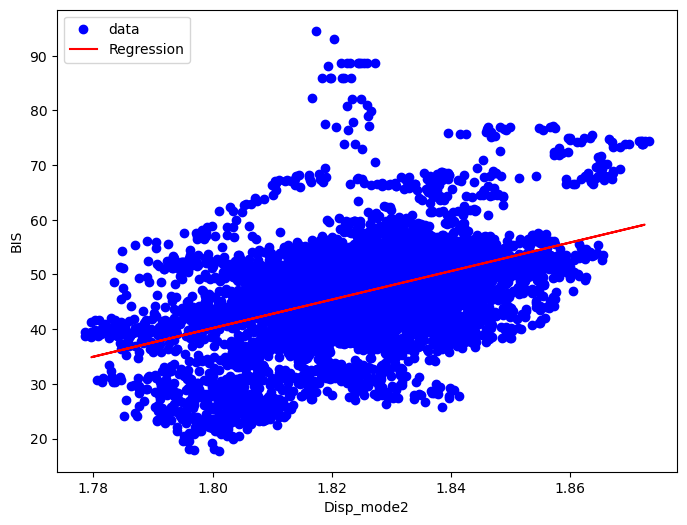

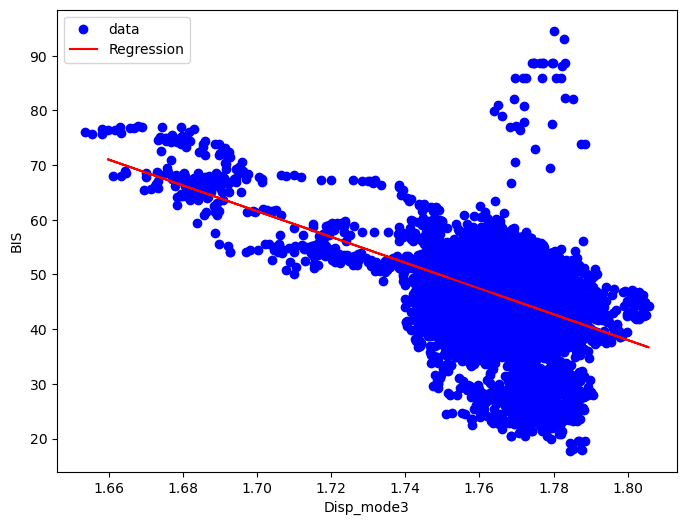

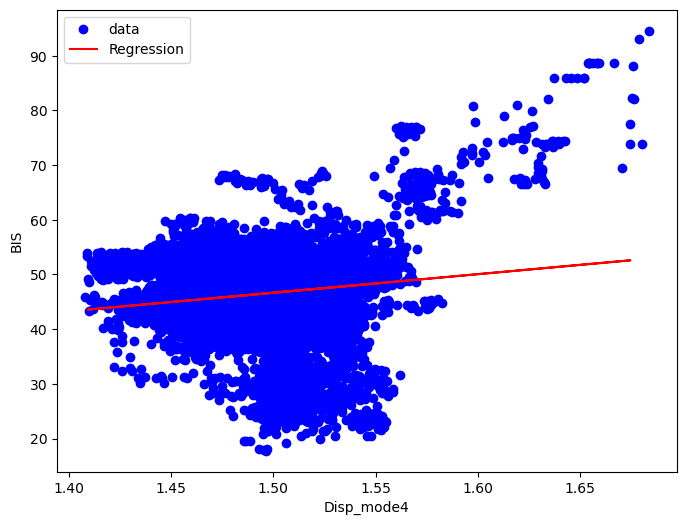

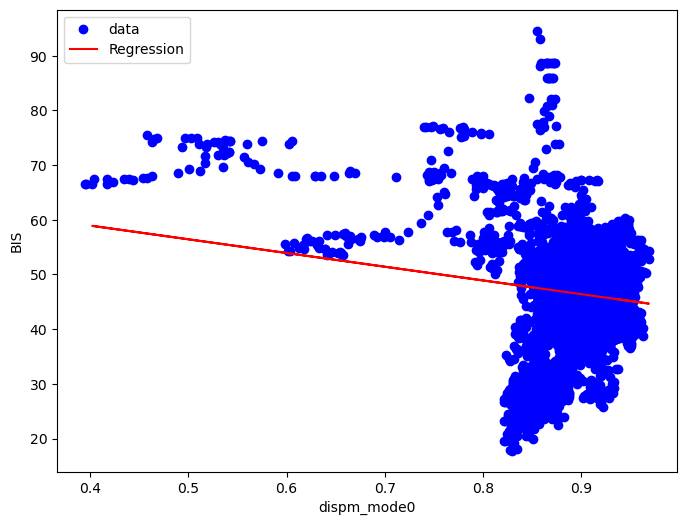

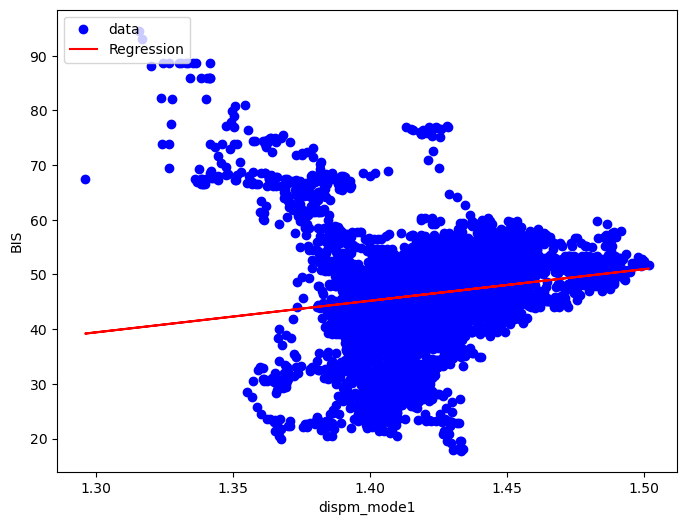

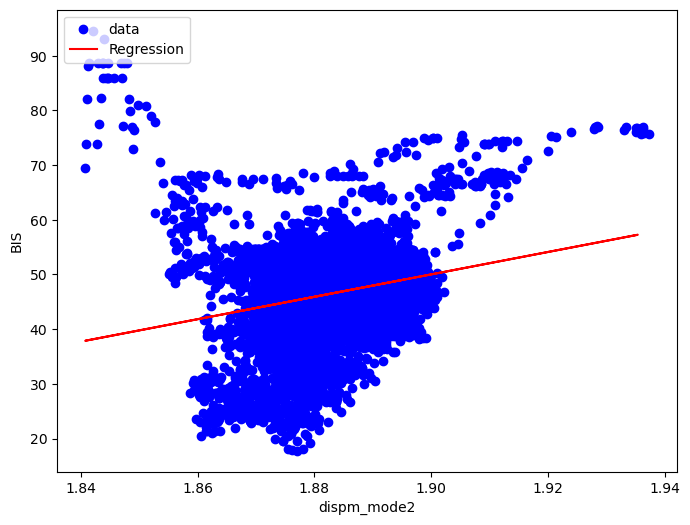

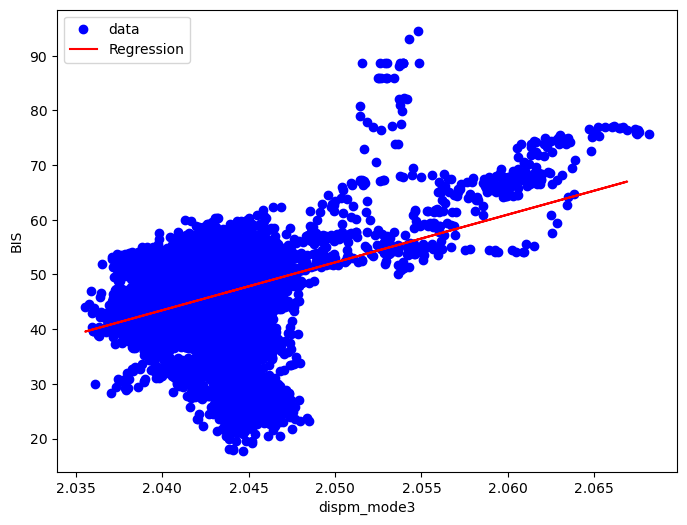

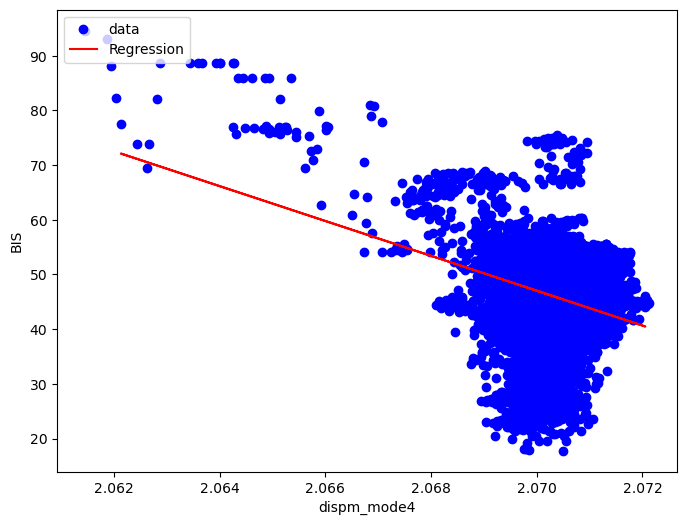

In [6]:

for column in patient_72.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_72, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
20,Perment_mode0_r2,40.076885
34,lzc_mode4_r2,38.702825
25,pet_mode0_r2,35.587548
21,Perment_mode1_r2,30.226723
53,Disp_mode3_r2,26.359354
26,pet_mode1_r2,25.681705
40,hfd_mode0_r2,24.450829
47,spec_mode2_r2,23.931814
22,Perment_mode2_r2,23.388785
52,Disp_mode2_r2,22.972428


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
21  Perment_mode1    0.325433
33      lzc_mode3    0.116589
51     Disp_mode1    0.107954
23  Perment_mode3    0.063445
41      hfd_mode1    0.040618
28      pet_mode3    0.024617
20  Perment_mode0    0.021043
34      lzc_mode4    0.019946
7        hc_mode2    0.017860
38      svd_mode3    0.015956
40      hfd_mode0    0.015081
3        hm_mode3    0.014216
25      pet_mode0    0.011483
43      hfd_mode3    0.011394
44      hfd_mode4    0.010610
30      lzc_mode0    0.009680
37      svd_mode2    0.009401
31      lzc_mode1    0.008800
32      lzc_mode2    0.008510
26      pet_mode1    0.008489
5        hc_mode0    0.007705
36      svd_mode1    0.007609
16     detf_mode1    0.007607
8        hc_mode3    0.006837
57    dispm_mode2    0.006573
4        hm_mode4    0.006006
55    dispm_mode0    0.005872
6        hc_mode1    0.005411
24  Perment_mode4    0.005117
22  Perment_mode2    0.004947
59    dispm_mode4    0.004686
52     Disp_mode2    0.004635
2        h